In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [11]:
wine_dataset = load_wine()
data = pd.DataFrame(wine_dataset.data,
                      columns=wine_dataset.feature_names)
data['Y'] = wine_dataset.target
data.shape

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/datasets/base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/datasets/base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

(178, 14)

In [12]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [13]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [14]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('Y', axis=1)

In [15]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [16]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((142, 13), (36, 13))

In [17]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [18]:
data_cs11_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [19]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

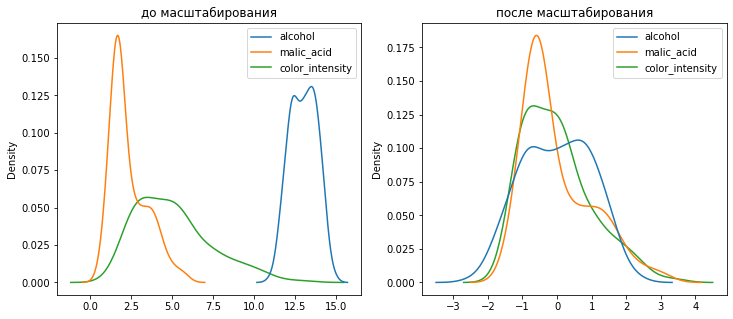

In [20]:
draw_kde(['alcohol', 'malic_acid', 'color_intensity'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [21]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [22]:
data_cs12_scaled_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02
mean,5.876364e-15,-4.049968e-16,-1.150879e-15,-1.476128e-15,4.472166e-16,1.254083e-15,4.941274e-16,-1.454236e-15,-1.376051e-16,-7.724650e-16,-3.283758e-16,4.503440e-16,6.567516e-17
std,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00
min,-2.450109e+00,-1.290696e+00,-3.568047e+00,-2.685087e+00,-2.076741e+00,-2.036411e+00,-1.632019e+00,-1.976952e+00,-1.978201e+00,-1.593457e+00,-1.785547e+00,-1.847562e+00,-1.548804e+00
25%,-8.052291e-01,-6.962761e-01,-5.534794e-01,-6.333231e-01,-7.798562e-01,-8.847493e-01,-9.383896e-01,-8.069072e-01,-5.798549e-01,-8.264516e-01,-8.153279e-01,-9.334496e-01,-7.927887e-01
50%,7.183187e-02,-4.537869e-01,-1.516382e-02,-2.455807e-02,-1.314136e-01,-5.872972e-02,8.837999e-02,-2.218848e-01,-1.766509e-01,-1.787579e-01,6.768041e-02,2.538462e-01,-2.207596e-01
75%,8.334080e-01,7.028650e-01,6.218430e-01,5.917225e-01,5.170289e-01,8.348011e-01,7.745505e-01,5.929679e-01,5.654159e-01,4.817192e-01,6.999580e-01,8.142218e-01,7.384764e-01
max,2.294136e+00,2.915311e+00,3.142954e+00,2.696095e+00,4.551783e+00,2.570236e+00,3.081674e+00,2.201780e+00,3.460763e+00,3.400602e+00,3.272674e+00,1.977001e+00,3.141166e+00


In [23]:
data_cs12_scaled_test.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.050330,-0.285690,0.218106,-0.054621,0.326899,0.260294,0.236719,-0.194027,0.237038,0.081290,-0.043755,0.158505,0.097592
std,1.065803,0.725327,0.897767,1.018644,1.100141,0.941037,0.941612,1.175999,0.879652,0.934068,0.982369,0.962004,1.243789
min,-1.975684,-1.428035,-2.168426,-2.264212,-1.068053,-1.401012,-1.492796,-1.893378,-1.309054,-1.261088,-2.090784,-1.819543,-1.435067
25%,-0.733441,-0.655504,-0.266378,-0.821214,-0.527684,-0.662359,-0.637569,-1.224780,-0.275307,-0.738033,-0.662709,-0.460633,-0.853002
50%,0.071832,-0.531040,0.218106,0.065629,0.156783,0.401935,0.312131,-0.347247,0.295183,0.034299,0.002272,0.442973,-0.379657
75%,0.895832,0.134196,0.819225,0.591723,1.003361,0.965852,1.013218,0.551181,0.702677,0.513678,0.645451,1.006851,0.858067
max,1.732317,1.893852,2.030436,3.147032,3.759242,1.648907,1.649666,2.452504,2.396991,2.867959,1.528460,1.402616,2.696254


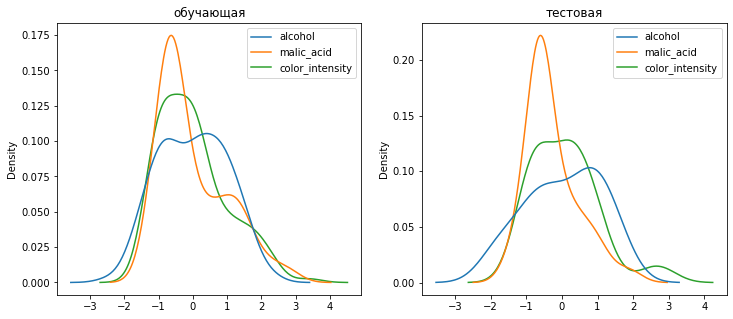

In [24]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['alcohol', 'malic_acid', 'color_intensity'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

In [25]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [26]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.002146,-0.013737,0.006573,-0.002053,0.009974,0.011428,0.010157,-0.009391,0.008814,0.003292,-0.001750,0.008382,0.004208
std,0.213639,0.227989,0.146708,0.186568,0.155244,0.215811,0.210730,0.248907,0.180555,0.197806,0.197044,0.260070,0.224613
min,-0.516438,-0.339523,-0.531671,-0.498977,-0.313304,-0.442059,-0.346229,-0.473099,-0.363709,-0.319071,-0.413344,-0.483078,-0.330237
25%,-0.165780,-0.163502,-0.077126,-0.130262,-0.117652,-0.179128,-0.163740,-0.193099,-0.098725,-0.153542,-0.152568,-0.238572,-0.171536
50%,0.015141,-0.109931,0.003088,-0.001770,-0.008956,0.032079,0.032463,-0.053099,-0.002510,-0.028115,0.004760,0.070036,-0.048140
75%,0.180272,0.138538,0.108703,0.109961,0.088870,0.185527,0.188581,0.141901,0.122095,0.100725,0.138380,0.212893,0.174042
max,0.483562,0.693130,0.468329,0.584822,0.686696,0.557941,0.653771,0.586901,0.636291,0.680929,0.647001,0.516922,0.669763


In [27]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [28]:
data_cs22_scaled_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02
mean,1.239228e-15,-1.020311e-16,-1.673153e-16,-2.689554e-16,6.684794e-17,2.720828e-16,1.016401e-16,-3.475311e-16,-2.189172e-17,-1.532421e-16,-6.723886e-17,1.188408e-16,1.446417e-17
std,2.115278e-01,2.385968e-01,1.495365e-01,1.864906e-01,1.513972e-01,2.178460e-01,2.128989e-01,2.401542e-01,1.845094e-01,2.009467e-01,1.983978e-01,2.623933e-01,2.139758e-01
min,-5.164381e-01,-3.068698e-01,-5.316713e-01,-4.989771e-01,-3.133037e-01,-4.420593e-01,-3.462293e-01,-4.730986e-01,-3.637091e-01,-3.190706e-01,-3.529990e-01,-4.830780e-01,-3.302375e-01
25%,-1.697276e-01,-1.655433e-01,-8.247345e-02,-1.176922e-01,-1.176516e-01,-1.920593e-01,-1.990774e-01,-1.930986e-01,-1.066113e-01,-1.654869e-01,-1.611887e-01,-2.440670e-01,-1.690392e-01
50%,1.514085e-02,-1.078902e-01,-2.259547e-03,-4.563695e-03,-1.982547e-02,-1.274891e-02,1.874963e-02,-5.309859e-02,-3.247878e-02,-3.579412e-02,1.338028e-02,6.637259e-02,-4.707058e-02
75%,1.756672e-01,1.671098e-01,9.266024e-02,1.099614e-01,7.800061e-02,1.812166e-01,1.643192e-01,1.419014e-01,1.039565e-01,9.645844e-02,1.383803e-01,2.128927e-01,1.574587e-01
max,4.835619e-01,6.931302e-01,4.683287e-01,5.010229e-01,6.866963e-01,5.579407e-01,6.537707e-01,5.269014e-01,6.362909e-01,6.809294e-01,6.470010e-01,5.169220e-01,6.697625e-01


In [29]:
data_cs22_scaled_test.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.010609,-0.067924,0.032500,-0.010150,0.049317,0.056504,0.050219,-0.046432,0.043582,0.016277,-0.008650,0.041444,0.020809
std,0.224652,0.172450,0.133775,0.189298,0.165971,0.204278,0.199761,0.281425,0.161732,0.187036,0.194212,0.251533,0.265202
min,-0.416438,-0.339523,-0.323115,-0.420765,-0.161130,-0.304128,-0.316693,-0.453099,-0.240681,-0.252518,-0.413344,-0.475752,-0.305986
25%,-0.154596,-0.155849,-0.039693,-0.152608,-0.079608,-0.143783,-0.135259,-0.293099,-0.050618,-0.147782,-0.131016,-0.120441,-0.181878
50%,0.015141,-0.126258,0.032500,0.012196,0.023653,0.087251,0.066218,-0.083099,0.054272,0.006868,0.000449,0.115823,-0.080951
75%,0.188825,0.031906,0.122072,0.109961,0.151370,0.209665,0.214952,0.131901,0.129193,0.102858,0.127604,0.263259,0.182958
max,0.365141,0.450273,0.302553,0.584822,0.567131,0.357941,0.349973,0.586901,0.440707,0.574274,0.302173,0.366739,0.574898


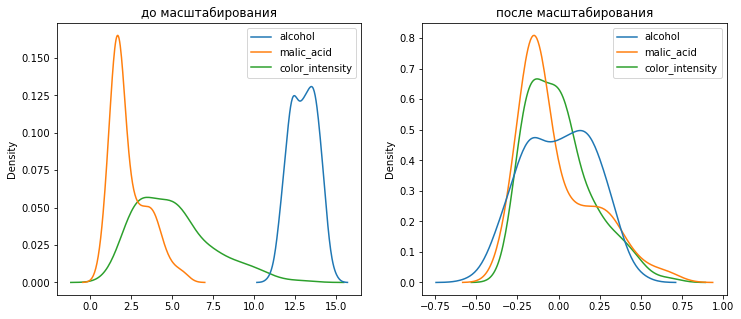

In [30]:
draw_kde(['alcohol', 'malic_acid', 'color_intensity'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

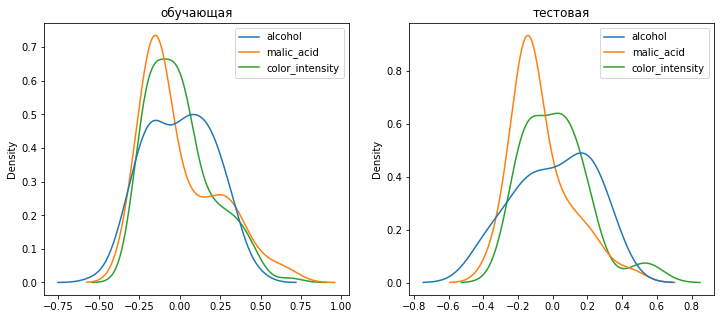

In [31]:
draw_kde(['alcohol', 'malic_acid', 'color_intensity'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

In [32]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

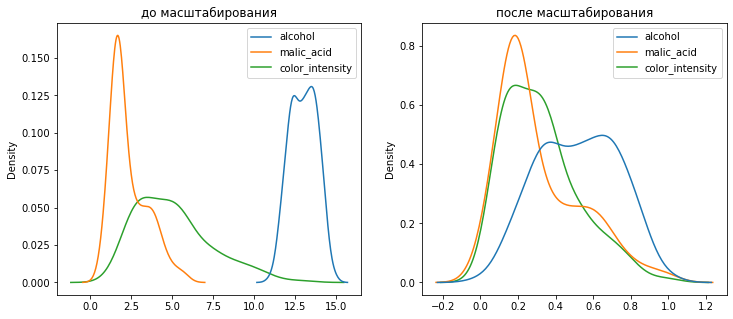

In [34]:
draw_kde(['alcohol', 'malic_acid', 'color_intensity'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

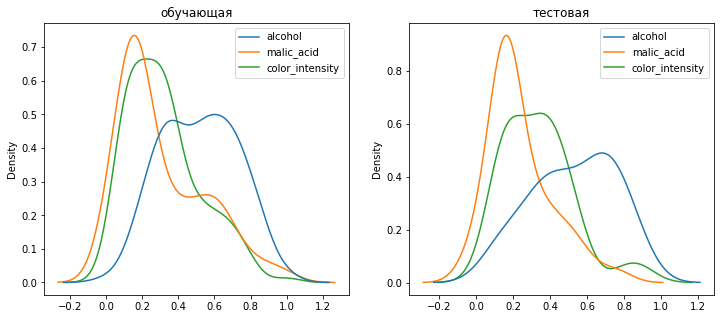

In [35]:
draw_kde(['alcohol', 'malic_acid', 'color_intensity'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

In [36]:
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [37]:
x_col_list = ['ash', 'magnesium', 'flavanoids']

In [38]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

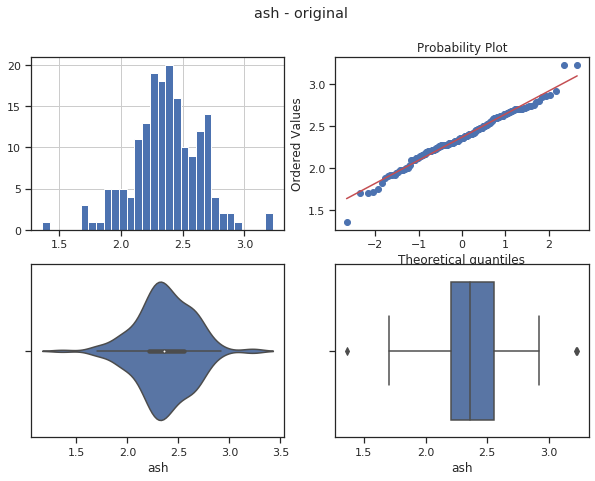

In [39]:
diagnostic_plots(data, 'ash', 'ash - original')

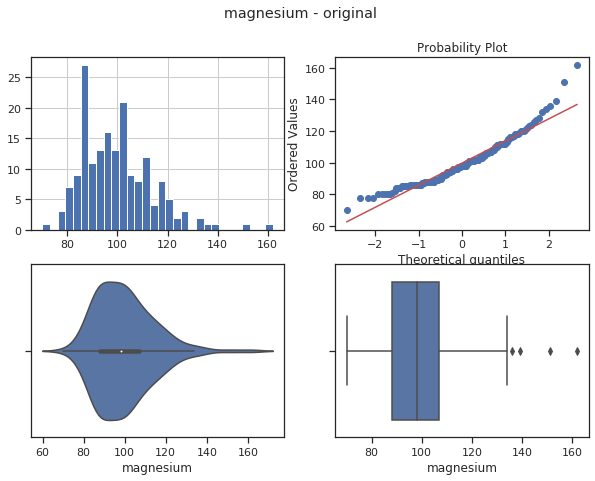

In [40]:
diagnostic_plots(data, 'magnesium', 'magnesium - original')

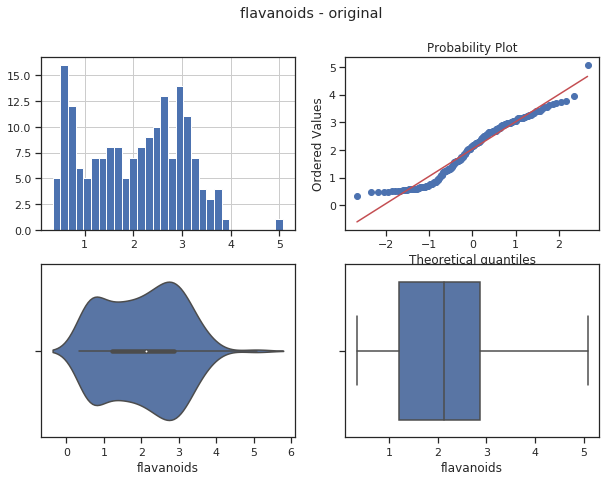

In [41]:
diagnostic_plots(data, 'flavanoids', 'flavanoids - original')

In [42]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [43]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary    

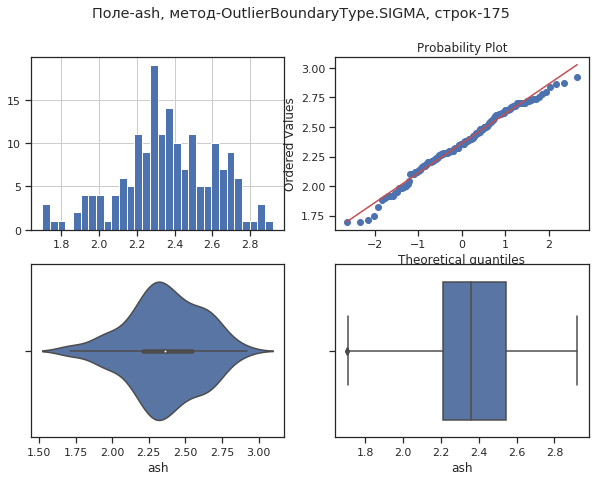

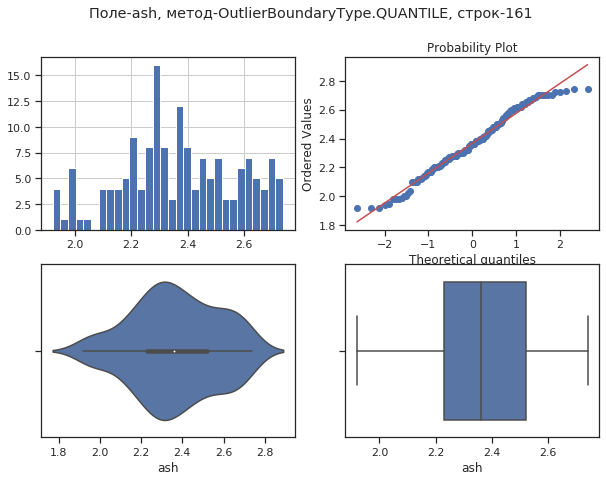

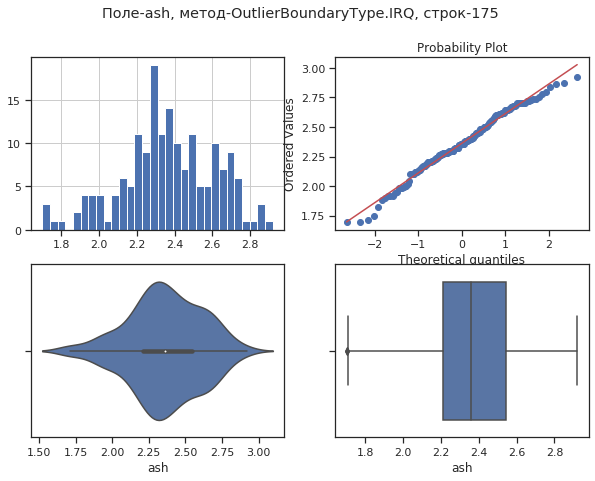

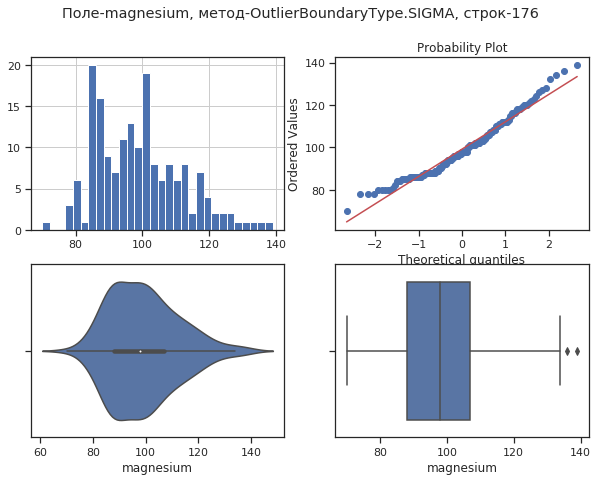

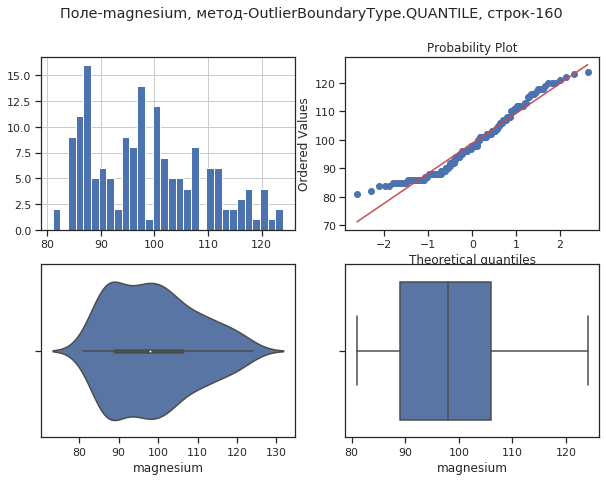

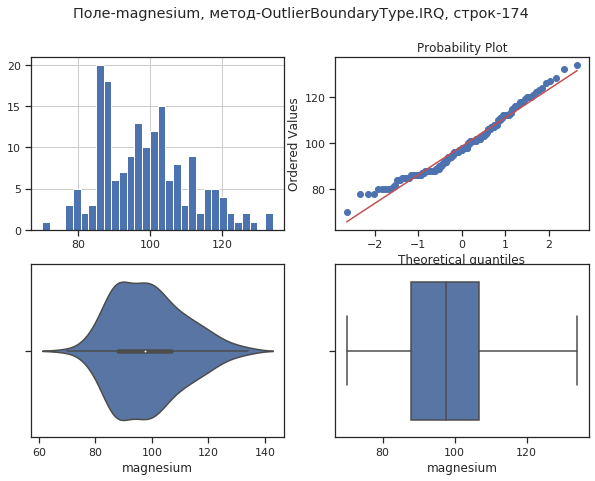

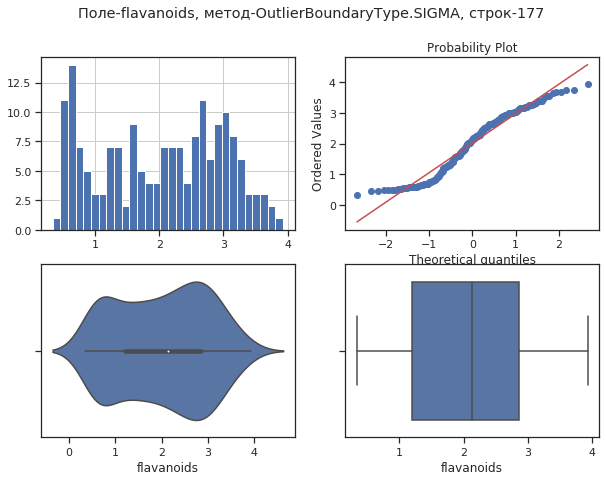

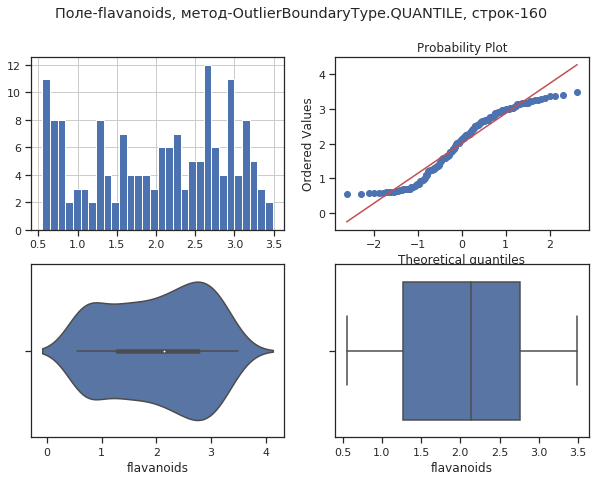

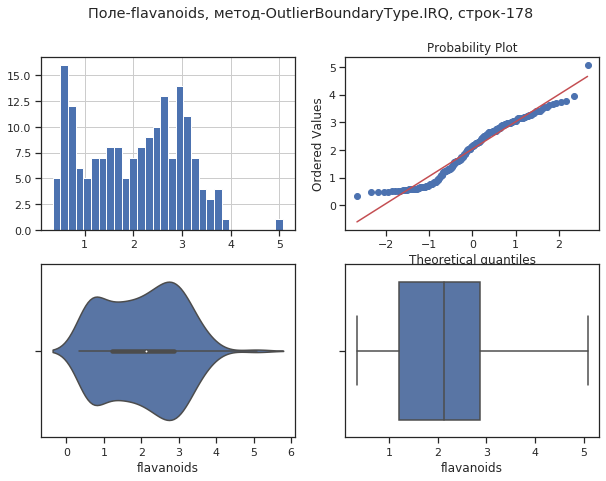

In [44]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

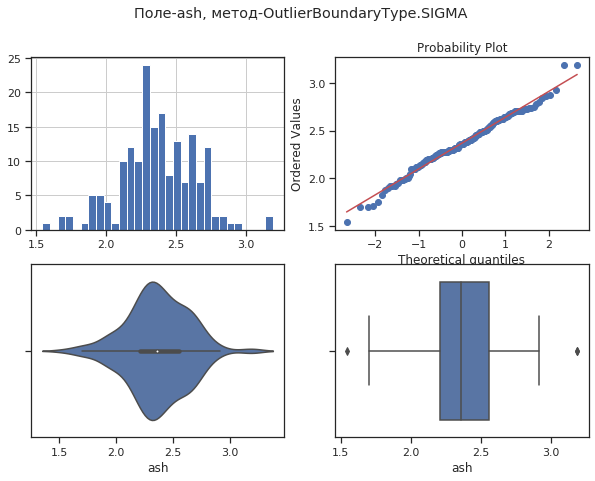

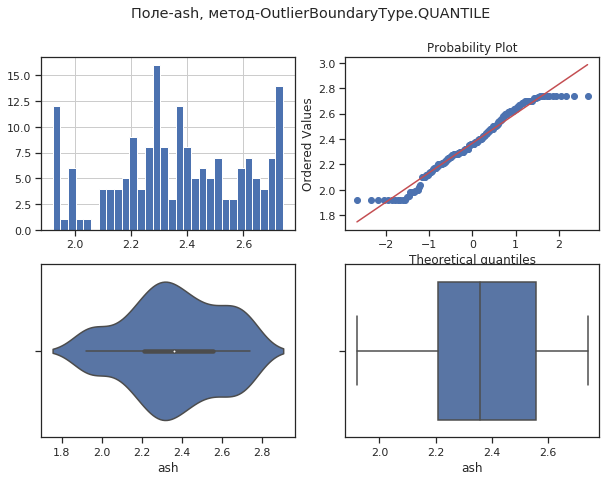

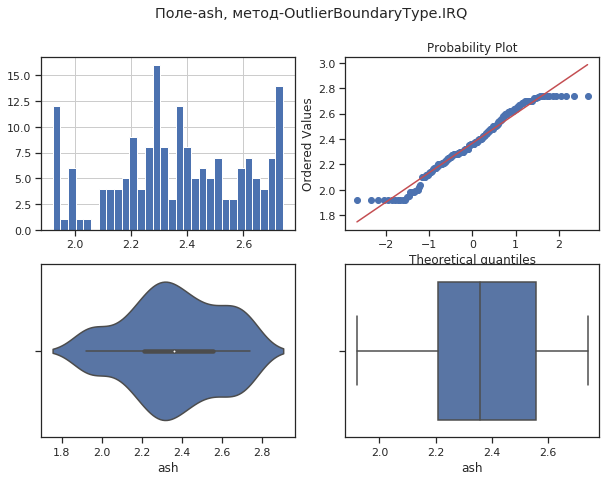

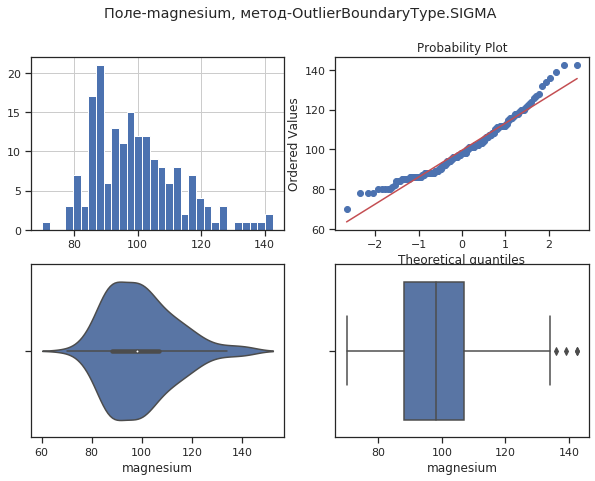

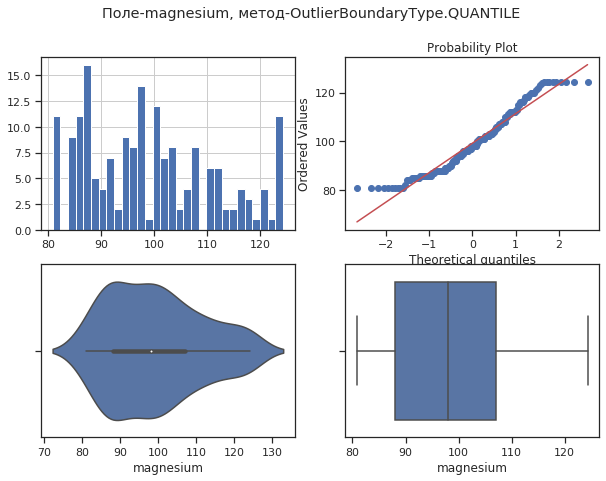

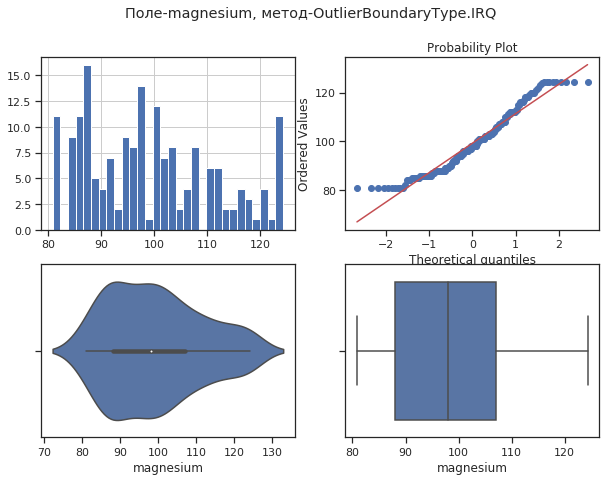

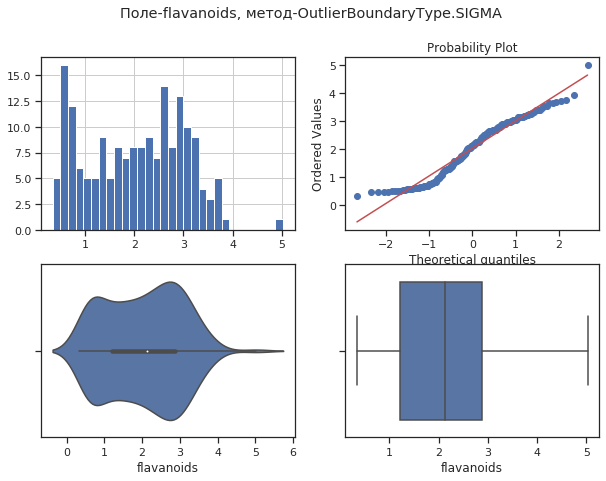

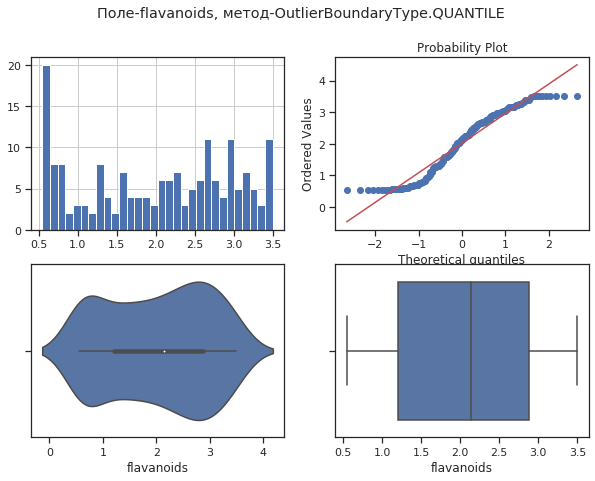

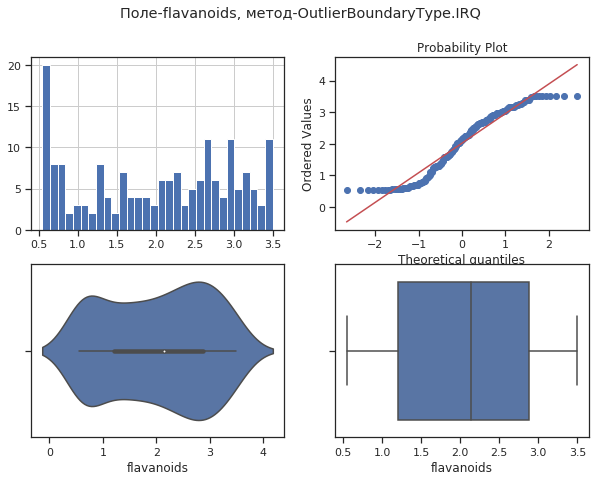

In [45]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [47]:
wine_dataset_X = wine_dataset.data
wine_dataset_y = wine_dataset.target
wine_dataset_feature_names = wine_dataset['feature_names']
wine_dataset_x_df = pd.DataFrame(data=wine_dataset['data'], columns=wine_dataset['feature_names'])

In [48]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [49]:
make_corr_df(data)

,f1,f2,corr
0,flavanoids,Y,0.869945
1,Y,flavanoids,0.869945
2,flavanoids,total_phenols,0.865853
3,total_phenols,flavanoids,0.865853


In [50]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [51]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['Y', 'total_phenols', 'flavanoids']]

In [54]:
#Логичтическая регрессия
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(wine_dataset_X, wine_dataset_y)
# Коэффициенты регрессии
e_lr1.coef_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[ 1.88233800e+00,  2.04463410e+00,  8.20700485e+00,
        -1.72409834e+00,  3.48238920e-01, -8.87213196e+00,
         1.65337921e+01,  3.66149691e+00, -7.41480864e+00,
        -7.39318577e-01, -1.42953351e+01,  3.91273420e+00,
         4.05727668e-02],
       [-3.32251368e-01, -2.77936749e+00, -8.96657968e+00,
         8.15283414e-01, -1.23208021e-01,  9.77267544e-01,
         1.15294678e+00,  2.78951826e+00,  2.53079185e+00,
        -4.08921027e+00,  1.49802250e+01, -2.80726871e+00,
        -3.10470388e-02],
       [ 1.71238277e-01,  1.88785125e+00,  1.45820743e+00,
         1.96103188e-01,  4.60520645e-02,  2.23433361e-01,
        -9.26853949e+00, -1.09088783e+01, -3.23950999e+00,
         2.49438052e+00, -9.12174295e+00, -5.03743779e+00,
         6.37131882e-03]])

In [55]:
# Все признакИ являются "хорошими"
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(wine_dataset_X, wine_dataset_y)
sel_e_lr1.get_support()

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [56]:
#Линнейный классификатор на основе SVM
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(wine_dataset_X, wine_dataset_y)
# Коэффициенты регрессии
e_lr2.coef_

array([[ 0.        ,  0.        ,  0.        , -0.10321598, -0.01111568,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.00362961],
       [ 0.        ,  0.        ,  0.        ,  0.03595193,  0.01484843,
         0.        ,  0.        ,  0.        ,  0.        , -0.21632938,
         0.        ,  0.        , -0.00192869],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.00449067,
         0.        , -0.19942267,  0.        ,  0.        ,  0.2091719 ,
         0.        ,  0.        , -0.0008907 ]])

In [57]:
# Признаки:1-3, 6, 8-9, 11-12 исключены
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(wine_dataset_X, wine_dataset_y)
sel_e_lr2.get_support()

array([False, False, False,  True,  True, False,  True, False, False,
        True, False, False,  True])

In [59]:
#Линейная регрессия
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(wine_dataset_X, wine_dataset_y)
# Коэффициенты регрессии
list(zip(wine_dataset_feature_names, e_ls1.coef_))

[('alcohol', 0.0),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', -0.0),
 ('flavanoids', -0.0),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', -0.0),
 ('color_intensity', 0.0),
 ('hue', -0.0),
 ('od280/od315_of_diluted_wines', -0.0),
 ('proline', -0.0015495319900322825)]

In [60]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(wine_dataset_X, wine_dataset_y)
list(zip(wine_dataset_feature_names, sel_e_ls1.get_support()))

[('alcohol', False),
 ('malic_acid', False),
 ('ash', False),
 ('alcalinity_of_ash', False),
 ('magnesium', False),
 ('total_phenols', False),
 ('flavanoids', False),
 ('nonflavanoid_phenols', False),
 ('proanthocyanins', False),
 ('color_intensity', False),
 ('hue', False),
 ('od280/od315_of_diluted_wines', False),
 ('proline', True)]